In [9]:
import numpy as np
import pandas as pd
#Reading the dataset
data= pd.read_excel('C:/Users/frequency/Desktop/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')

data= data.to_numpy()
from sklearn.impute import MissingIndicator

#Dealing with missing data
indi= MissingIndicator(features='all')
i= indi.fit_transform(data)
j=0
while j<61900:
    k=0
    while k<11:
        if i[j,k]==True:
            data[j,k]='?'
            k+=1
        else:
            k+=1
    j+=1
indi= MissingIndicator()
i= indi.fit_transform(data)

A= np.concatenate((data[:,5:8], data[:,9:10]),axis=1)
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
A= encoder.fit_transform(A)
B= encoder.categories_

j=0
while j<61900:
    k=0
    while k<4:
        if A[j,k]==0:
            A[j,k]=np.nan
            k+=1
        else:
            k+=1
    j+=1

data= np.concatenate((data[:,:5], data[:,8:9], data[:, 10:11], A), axis=1)
j=0
while j<61900:
    k=0
    while k<11:
        if data[j,k]=='?':
            data[j,k]=np.nan
            k+=1
        else:
            k+=1
    j+=1

    #Replacing missing data using KNN Imputer
from sklearn.impute import KNNImputer
imputer=KNNImputer()
data= imputer.fit_transform(data)

data= pd.DataFrame(data)
corr= data.corr()

In [17]:
data.shape

(61900, 11)

In [13]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
Scaler.fit (data)
data_trans= Scaler.transform (data)

In [27]:
#Agglomerative Hierarchical Clustering with 3 clusters for each lockdown type
from sklearn.cluster import AgglomerativeClustering
clustering= AgglomerativeClustering(n_clusters=3).fit(data_trans)
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
data2=pd.DataFrame(clustering.labels_)

In [34]:
#Orodusing the new excel file that includes labels (0,1,2) for each corresponding lockdown type
data2.to_excel('C:/Users/frequency/Desktop/data2.xlsx')

In [1]:
#Reading in the new data set
import numpy as np
import pandas as pd
data= pd.read_excel('C:/Users/frequency/Desktop/data2.xlsx')

In [2]:
data.shape

(61900, 2)

In [15]:
data1= data.values
X= data1[:,:1]
y= data1 [:,1:2]

In [16]:
X

array([[    0],
       [    1],
       [    2],
       ...,
       [61897],
       [61898],
       [61899]], dtype=int64)

In [17]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

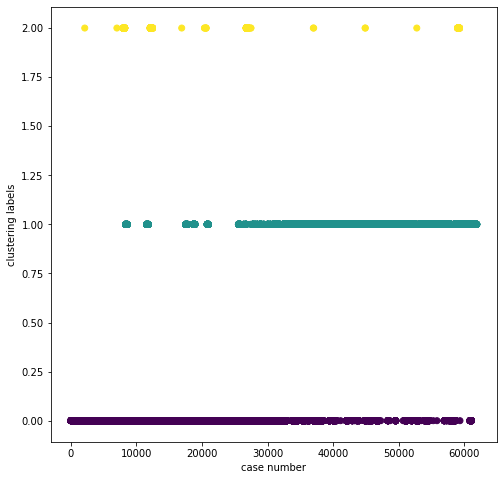

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X, y, c=y)
plt.xlabel('case number')
plt.ylabel('clustering labels')
plt.show()


In [1]:
import numpy as np
import pandas as pd
data= pd.read_excel('C:/Users/frequency/Desktop/2.xlsx')

In [29]:
data1= data.values
X= data1[:,4:5]
y= data1 [:,11:12]
df= pd.DataFrame(X)
print ("Original Array :")

Original Array :


In [30]:
#Removing negative values from the dataset
df[df < 0] = 0
print("New Array :")

New Array :


In [31]:
X

array([[6],
       [9],
       [11],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [32]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=object)

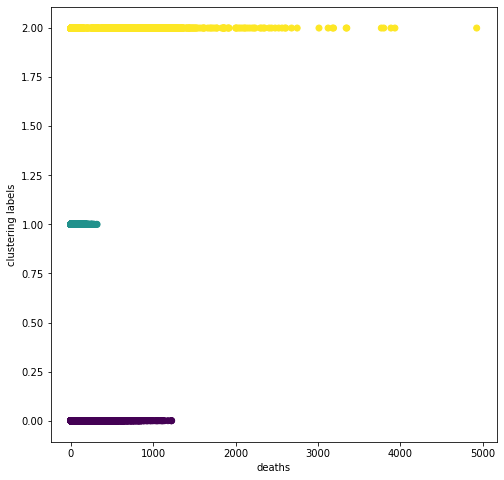

In [33]:
# Observing the death ratios based on each lockdown type 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X, y, c=y)
plt.xlabel('deaths')
plt.ylabel('clustering labels')
plt.show()